# Imports

In [1]:
#pip install import_ipynb

In [2]:
import pandas as pd
import json
import import_ipynb
import matplotlib.pyplot as plt #visualizations
from datetime import datetime

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


import seaborn as sns #visualizations

In [3]:
from synthetic_invoices_with_label import *

Generating 10 synthetic invoices across a set of 100 merchants (anomaly rate: 5.0%)...
Analysis of 10 invoices:
- Unique merchants: 8
- Total line items: 30
- Average line items per invoice: 3.00

Field frequency:
- merchant: 10 (100.0%)
- invoice_date: 10 (100.0%)
- merchant_branch: 10 (100.0%)
- merchant_chain: 10 (100.0%)
- due_date: 10 (100.0%)
- payment_terms: 10 (100.0%)
- grand_total: 10 (100.0%)
- tax: 10 (100.0%)
- po_number: 10 (100.0%)
- merchant_address: 10 (100.0%)
- payment_method: 10 (100.0%)
- country: 10 (100.0%)
- currency: 10 (100.0%)
- label: 10 (100.0%)
- line_details: 10 (100.0%)
- is_duplicate_po: 10 (100.0%)
Generated 10 synthetic invoices and saved to synthetic_invoices2.json
Saved invoices in JSONL format to synthetic_invoices2.jsonl


Functions

In [4]:
def json_to_df(filename):
    '''
    converts json string from json file to pd dataframe
    '''
    with open(filename) as file:
        data = json.load(file)

    formatted_data = []
    for item in data:
        row = {entry["field"]: entry["value"] for entry in item["extractions"]}
        formatted_data.append(row)

    df = pd.DataFrame(formatted_data)
    return df

In [5]:
def string_to_df(json_string):
    '''
    converts json string to pd dataframe
    '''
    formatted_data = []
    for item in json_string:
        row = {entry["field"]: entry["value"] for entry in item["extractions"]}
        formatted_data.append(row)

    df = pd.DataFrame(formatted_data)
    return df

# Data

In [6]:
data = generate_dataset(num_invoices=100,num_merchants=100) #creates json in synthetic_invoices.json

Generating 100 synthetic invoices across a set of 100 merchants (anomaly rate: 5.0%)...
Analysis of 100 invoices:
- Unique merchants: 43
- Total line items: 332
- Average line items per invoice: 3.32

Field frequency:
- merchant: 100 (100.0%)
- invoice_date: 100 (100.0%)
- merchant_branch: 100 (100.0%)
- merchant_chain: 100 (100.0%)
- due_date: 100 (100.0%)
- payment_terms: 100 (100.0%)
- grand_total: 100 (100.0%)
- tax: 100 (100.0%)
- po_number: 100 (100.0%)
- merchant_address: 100 (100.0%)
- payment_method: 100 (100.0%)
- country: 100 (100.0%)
- currency: 100 (100.0%)
- label: 100 (100.0%)
- line_details: 100 (100.0%)
- is_duplicate_po: 100 (100.0%)
Generated 100 synthetic invoices and saved to synthetic_invoices2.json
Saved invoices in JSONL format to synthetic_invoices2.jsonl


In [7]:
data

[{'extractions': [{'field': 'merchant', 'value': 'DreamFight'},
   {'field': 'invoice_date', 'value': '10/22/2024'},
   {'field': 'merchant_branch', 'value': 'DreamFight'},
   {'field': 'merchant_chain', 'value': 'DreamFight'},
   {'field': 'due_date', 'value': '12/21/2024'},
   {'field': 'payment_terms', 'value': 'NET 60 DAYS'},
   {'field': 'grand_total', 'value': '7624.62'},
   {'field': 'tax', 'value': '399.62'},
   {'field': 'po_number', 'value': '49478-456'},
   {'field': 'merchant_address',
    'value': '6037 Lewis Field Apt. 013 Port Amberfurt OH 82847 USA'},
   {'field': 'payment_method', 'value': 'DHL Express'},
   {'field': 'country', 'value': 'US'},
   {'field': 'currency', 'value': 'USD'},
   {'field': 'label', 'value': 1},
   {'field': 'line_details',
    'value': [{'line_count': '1',
      'line_description': 'SDU-485 Extended Electrical Component',
      'line_qty': '10',
      'line_tax': '399.62',
      'line_total': '6949.93'},
     {'line_count': '2',
      'line_de

In [8]:
#df1 = json_to_df('synthetic_invoices.json') # puts synthetic_invoices.json into df

In [9]:
df1 = string_to_df(data) # 

In [10]:
df1

,merchant,invoice_date,merchant_branch,merchant_chain,due_date,payment_terms,grand_total,tax,po_number,merchant_address,payment_method,country,currency,label,line_details,is_duplicate_po
0,DreamFight,10/22/2024,DreamFight,DreamFight,12/21/2024,NET 60 DAYS,7624.62,399.62,49478-456,6037 Lewis Field Apt. 013 Port Amberfurt OH 82...,DHL Express,US,USD,1,"[{'line_count': '1', 'line_description': 'SDU-...",0
1,OfficerThan,02/01/2025,OfficerThan,OfficerThan,03/03/2025,NET 30 DAYS,4008.91,235.82,209493,7831 Robert Centers Apt. 306 Robertsview MA 66...,UPS Ground,US,USD,0,"[{'line_count': '1', 'line_description': 'W-00...",0
2,Walker,01/23/2025,Walker,Walker,02/22/2025,NET 30 DAYS,51244.87,2717.53,PO-69996,421 Robert Glens North Meganburgh AZ 73492 USA,DHL Express,US,USD,0,"[{'line_count': '1', 'line_description': 'X-78...",0
3,Jones & Wilson,02/10/2025,Jones & Wilson,Jones & Wilson,03/27/2025,NET 45 DAYS,85271.37,4992.27,PO-40107,1910 Booth Roads Suite 855 Lake Andrea WA 9291...,USPS Priority,US,USD,0,"[{'line_count': '1', 'line_description': 'FN-1...",0
4,Baker,12/24/2024,Baker,Baker,02/07/2025,NET 45 DAYS,72620.57,1632.32,CUST-69037-1203,052 Allen Trafficway Nicholasbury CT 49123 USA,UPS Ground,US,USD,0,"[{'line_count': '1', 'line_description': 'J-21...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Walker,01/28/2025,Walker,Walker,02/12/2025,NET 15 DAYS,16026.49,849.31,C79185,421 Robert Glens North Meganburgh AZ 73492 USA,FedEx Express,US,USD,0,"[{'line_count': '1', 'line_description': 'V-17...",0
96,Jones & Wilson,02/27/2025,Jones & Wilson,Jones & Wilson,04/13/2025,NET 45 DAYS,16278.20,990.50,G35644,1910 Booth Roads Suite 855 Lake Andrea WA 9291...,FedEx Ground,US,USD,0,"[{'line_count': '1', 'line_description': 'FR-1...",0
97,Hayes-Watson Electronics,01/13/2025,Hayes-Watson Electronics,Hayes-Watson Electronics,02/12/2025,NET 30 DAYS,13561.80,767.07,Y97914,93449 Hawkins Islands East Stacey IA 88619 USA,USPS Priority,US,USD,0,"[{'line_count': '1', 'line_description': 'X-49...",0
98,Martin-Kaiser LLC,02/14/2025,Martin-Kaiser LLC,Martin-Kaiser LLC,03/16/2025,NET 30 DAYS,15030.17,0.00,790573,21837 Douglas Cliffs Suite 259 North Melissapo...,UPS Ground,US,USD,0,"[{'line_count': '1', 'line_description': 'WLC-...",0


In [38]:
df1['tax']

0      399.62
1      235.82
2     2717.53
3     4992.27
4     1632.32
       ...   
95     849.31
96     990.50
97     767.07
98       0.00
99       0.00
Name: tax, Length: 100, dtype: object

In [39]:
data2 = generate_dataset(num_invoices=100,num_merchants=50)

Generating 100 synthetic invoices across a set of 50 merchants (anomaly rate: 5.0%)...
Analysis of 100 invoices:
- Unique merchants: 31
- Total line items: 331
- Average line items per invoice: 3.31

Field frequency:
- merchant: 100 (100.0%)
- invoice_date: 100 (100.0%)
- merchant_branch: 100 (100.0%)
- merchant_chain: 100 (100.0%)
- due_date: 100 (100.0%)
- payment_terms: 100 (100.0%)
- grand_total: 100 (100.0%)
- tax: 100 (100.0%)
- po_number: 100 (100.0%)
- merchant_address: 100 (100.0%)
- payment_method: 100 (100.0%)
- country: 100 (100.0%)
- currency: 100 (100.0%)
- label: 100 (100.0%)
- line_details: 100 (100.0%)
Generated 100 synthetic invoices and saved to synthetic_invoices2.json
Saved invoices in JSONL format to synthetic_invoices2.jsonl


In [40]:
df2 = string_to_df(data2)

In [41]:
df2

,merchant,invoice_date,merchant_branch,merchant_chain,due_date,payment_terms,grand_total,tax,po_number,merchant_address,payment_method,country,currency,label,line_details
0,EnterOfficer Technology LLC,02/21/2025,EnterOfficer Technology LLC,EnterOfficer Technology LLC,02/21/2025,DUE ON RECEIPT,39842.45,1714.82,612997,07878 Paula Points Boydland OK 51912 USA,USPS Priority,US,USD,0,"[{'line_count': '1', 'line_description': 'F-90..."
1,Gregory-Sanders,12/18/2024,Gregory-Sanders,Gregory-Sanders,12/18/2024,DUE ON RECEIPT,124564.73,4790.95,960607,2178 Kathleen Heights Littlemouth GA 73466 USA,DHL Express,US,USD,0,"[{'line_count': '1', 'line_description': 'Z-33..."
2,WorryAdult,02/27/2025,WorryAdult,WorryAdult,03/29/2025,NET 30 DAYS,117768.27,7933.48,PO-15975,23616 Blackburn Field Sergiochester TN 56955 USA,Wire Transfer,US,USD,0,"[{'line_count': '1', 'line_description': 'YAB-..."
3,WorryAdult,03/03/2025,WorryAdult,WorryAdult,04/17/2025,NET 45 DAYS,32144.66,2102.93,CUST-92941-3949,23616 Blackburn Field Sergiochester TN 56955 USA,UPS Ground,US,USD,0,"[{'line_count': '1', 'line_description': 'JHE-..."
4,Jones & Wilson,12/18/2024,Jones & Wilson,Jones & Wilson,02/16/2025,NET 60 DAYS,20887.36,1274.42,CUST-49173-3617,1910 Booth Roads Suite 855 Lake Andrea WA 9291...,FedEx Ground,US,USD,0,"[{'line_count': '1', 'line_description': 'E-00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MatterSouthern,10/18/2024,MatterSouthern,MatterSouthern,11/17/2024,NET 30 DAYS,38375.71,2172.21,J38885,48515 Jay Islands Apt. 470 West Emily MI 80341...,USPS Priority,US,USD,0,"[{'line_count': '1', 'line_description': 'E-90..."
96,Martin-Kaiser LLC,02/11/2025,Martin-Kaiser LLC,Martin-Kaiser LLC,04/12/2025,NET 60 DAYS,29597.01,0.00,CUST-92941-2895,21837 Douglas Cliffs Suite 259 North Melissapo...,Wire Transfer,US,USD,0,"[{'line_count': '1', 'line_description': 'J-58..."
97,Election GmbH,03/06/2025,Election GmbH,Election GmbH,05/05/2025,NET 60 DAYS,8695.24,438.17,2503-3022,400 Charles Ville Suite 561 New John VA 87139 USA,FedEx Express,US,USD,0,"[{'line_count': '1', 'line_description': 'FMS-..."
98,MatterSouthern,02/11/2025,MatterSouthern,MatterSouthern,03/13/2025,NET 30 DAYS,7871.97,445.58,CUST-94907-3681,48515 Jay Islands Apt. 470 West Emily MI 80341...,Wire Transfer,US,USD,0,"[{'line_count': '1', 'line_description': 'AQ-5..."


In [15]:
df2.describe()

,label
count,100.000000
mean,0.040000
std,0.196946
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


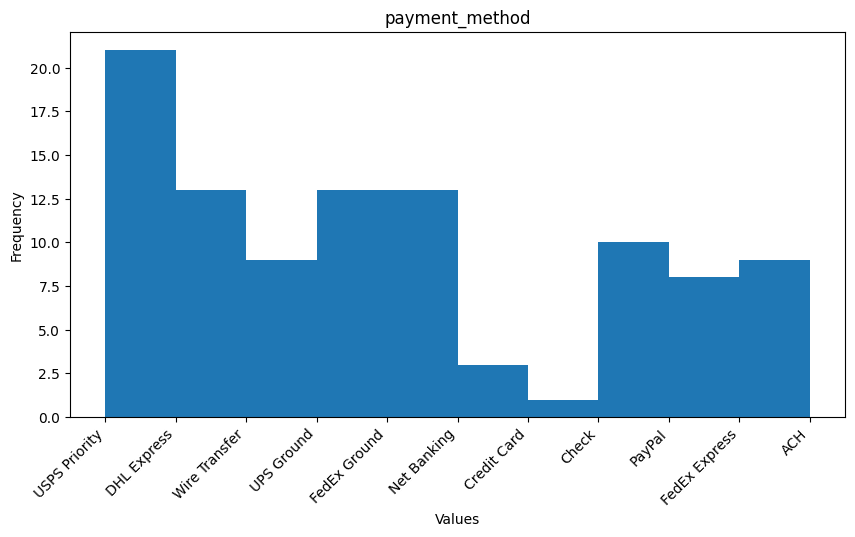

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(df2['payment_method'], bins=10)
plt.title('payment_method')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.show()

In [17]:
date_format = "%m/%d/%Y"

df2['invoice_date'] = df2['invoice_date'].apply(lambda x: datetime.strptime(x, date_format) )
df2['due_date'] =  df2['due_date'].apply(lambda x: datetime.strptime(x, date_format) )

In [18]:
df2['time to pay'] = df2['due_date'] - df2['invoice_date']

In [19]:
df2['tax'] = df2['tax'].astype(float)
df2['grand_total'] = df2['grand_total'].astype(float)

In [20]:
df2['tax_rate'] = df2['tax']/df2['grand_total']

In [21]:
### FROM CATHERINE'S CODE

# Function to extract state from address (format: "Street, City, State ZIP, Country")
def extract_state(address):
    match = re.search(r'\b[A-Z]{2}\b', address)  # Match two-letter state codes
    return match.group(0) if match else None

# Apply state extraction
df2["state"] = df2["merchant_address"].apply(extract_state)

In [22]:
df2 = df2.drop(columns=['merchant_address', 'line_details'])

In [24]:
df2

,merchant,invoice_date,merchant_branch,merchant_chain,due_date,payment_terms,grand_total,tax,po_number,payment_method,country,currency,label,time to pay,tax_rate,state
0,EnterOfficer Technology LLC,2025-02-21,EnterOfficer Technology LLC,EnterOfficer Technology LLC,2025-02-21,DUE ON RECEIPT,39842.45,1714.82,612997,USPS Priority,US,USD,0,0 days,0.043040,OK
1,Gregory-Sanders,2024-12-18,Gregory-Sanders,Gregory-Sanders,2024-12-18,DUE ON RECEIPT,124564.73,4790.95,960607,DHL Express,US,USD,0,0 days,0.038462,GA
2,WorryAdult,2025-02-27,WorryAdult,WorryAdult,2025-03-29,NET 30 DAYS,117768.27,7933.48,PO-15975,Wire Transfer,US,USD,0,30 days,0.067365,TN
3,WorryAdult,2025-03-03,WorryAdult,WorryAdult,2025-04-17,NET 45 DAYS,32144.66,2102.93,CUST-92941-3949,UPS Ground,US,USD,0,45 days,0.065421,TN
4,Jones & Wilson,2024-12-18,Jones & Wilson,Jones & Wilson,2025-02-16,NET 60 DAYS,20887.36,1274.42,CUST-49173-3617,FedEx Ground,US,USD,0,60 days,0.061014,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MatterSouthern,2024-10-18,MatterSouthern,MatterSouthern,2024-11-17,NET 30 DAYS,38375.71,2172.21,J38885,USPS Priority,US,USD,0,30 days,0.056604,MI
96,Martin-Kaiser LLC,2025-02-11,Martin-Kaiser LLC,Martin-Kaiser LLC,2025-04-12,NET 60 DAYS,29597.01,0.00,CUST-92941-2895,Wire Transfer,US,USD,0,60 days,0.000000,PR
97,Election GmbH,2025-03-06,Election GmbH,Election GmbH,2025-05-05,NET 60 DAYS,8695.24,438.17,2503-3022,FedEx Express,US,USD,0,60 days,0.050392,VA
98,MatterSouthern,2025-02-11,MatterSouthern,MatterSouthern,2025-03-13,NET 30 DAYS,7871.97,445.58,CUST-94907-3681,Wire Transfer,US,USD,0,30 days,0.056603,MI


Tax rate should be 0 if it is anomaly?

In [25]:
# Encode categorical columns
categorical_cols = ['merchant', 'invoice_date', 'merchant_branch', 'merchant_chain', 'due_date', 'payment_terms', 'po_number', 'payment_method', 'currency', 'country', 'time to pay', 'due_date', 'state']
label_encoders = {col: LabelEncoder() for col in categorical_cols}

for col in categorical_cols:
    df2[col] = label_encoders[col].fit_transform(df2[col].astype(str))

In [26]:
df2

,merchant,invoice_date,merchant_branch,merchant_chain,due_date,payment_terms,grand_total,tax,po_number,payment_method,country,currency,label,time to pay,tax_rate,state
0,6,54,6,6,36,2,39842.45,1714.82,28,9,0,0,0,0,0.043040,16
1,8,19,8,8,4,2,124564.73,4790.95,39,3,0,0,0,0,0.038462,4
2,30,59,30,30,57,4,117768.27,7933.48,77,10,0,0,0,2,0.067365,20
3,30,63,30,30,69,5,32144.66,2102.93,62,8,0,0,0,3,0.065421,20
4,12,19,12,12,31,6,20887.36,1274.42,55,5,0,0,0,4,0.061014,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17,5,17,17,56,4,38375.71,2172.21,71,9,0,0,0,2,0.056604,11
96,16,46,16,16,64,6,29597.01,0.00,61,10,0,0,0,4,0.000000,18
97,5,66,5,5,72,6,8695.24,438.17,6,4,0,0,0,4,0.050392,22
98,17,46,17,17,46,4,7871.97,445.58,64,10,0,0,0,2,0.056603,11


In [27]:
df2.describe()

,merchant,invoice_date,merchant_branch,merchant_chain,due_date,payment_terms,grand_total,tax,po_number,payment_method,country,currency,label,time to pay,tax_rate,state
count,100.00000,100.000000,100.00000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000
mean,15.80000,36.980000,15.80000,15.80000,37.240000,3.770000,36049.50570,1750.831600,49.500000,5.970000,0.0,0.0,0.040000,1.940000,0.042814,13.510000
std,9.15633,19.050162,9.15633,9.15633,20.864701,1.509933,61414.24944,3538.448571,29.011492,3.049938,0.0,0.0,0.196946,1.261873,0.023070,7.539117
min,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,96.54000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,8.00000,19.750000,8.00000,8.00000,21.000000,2.750000,3439.39000,34.842500,24.750000,3.000000,0.0,0.0,0.000000,1.000000,0.038007,6.000000
50%,15.00000,39.000000,15.00000,15.00000,36.500000,4.000000,11018.71500,261.980000,49.500000,7.000000,0.0,0.0,0.000000,2.000000,0.052296,14.000000
75%,24.00000,53.000000,24.00000,24.00000,55.250000,5.000000,32532.30000,1284.567500,74.250000,9.000000,0.0,0.0,0.000000,3.000000,0.061033,20.000000
max,30.00000,66.000000,30.00000,30.00000,74.000000,6.000000,321351.52000,18345.050000,99.000000,10.000000,0.0,0.0,1.000000,4.000000,0.071127,25.000000


# Feature Selection Models

### Decision Tree

In [27]:
# Define features and target
X = df2.drop(columns=['label'])
y = df2['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start with small max depth to prevent overfit

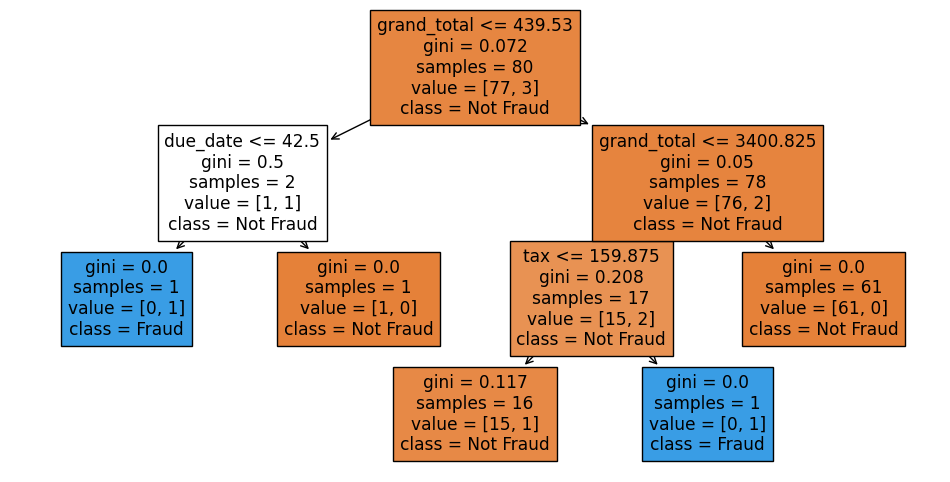

Model Accuracy: 0.80
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[16  3]
 [ 1  0]]


In [42]:
# train 
model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(X_train, y_train)

plt.figure(figsize=(12, 6))
plot_tree(model_tree, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()

# predict
y_pred_tree = model_tree.predict(X_test)
#print(y_pred_tree)

# accuracy
accuracy = model_tree.score(X_test, y_test)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Precision: How many predicted fraud were actually fraud, TP / all positives

Recall: How many actual fraud were correctly detected,  TP / TP + FN

Confusion Matrix: Shows (going across) TP, FP, TN, FN

The tree chooses top 3 most influential features:
- grand total
- due_date
- tax

compare with higher maxdepth

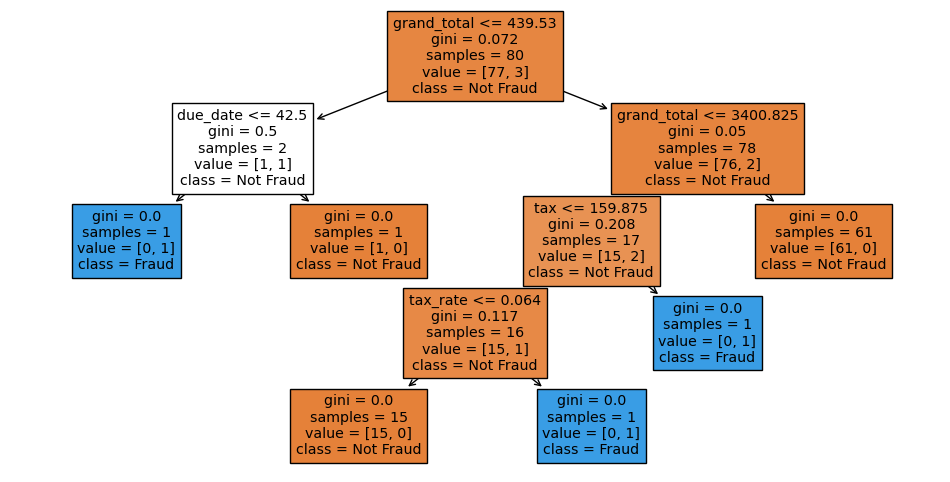

Model Accuracy: 0.80
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[16  3]
 [ 1  0]]


In [40]:
# train decision tree
model_tree = DecisionTreeClassifier(max_depth=10, random_state=42)
model_tree.fit(X_train, y_train)

# plot
plt.figure(figsize=(12, 6))
plot_tree(model_tree, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()

# predict
y_pred_tree = model_tree.predict(X_test)

# accuracy
accuracy = model_tree.score(X_test, y_test)
precision = precision_score(y_test, y_pred_tree)
recall = recall_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree)
conf_matrix = confusion_matrix(y_test, y_pred_tree)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

same model accuracy

uses same features as above, added tax_rate as a feature. Only uses 4 features.


In [34]:
# Train Logistic Regression Model
model_logreg = LogisticRegression(max_iter=1000, random_state=42)
model_logreg.fit(X_train, y_train)

# Make predictions
y_pred = model_logreg.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print Results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.85
Precision: 0.00
Recall: 0.00
F1-Score: 0.00
Confusion Matrix:
[[17  2]
 [ 1  0]]


In [ ]:
'''
# use these two features
feature1 = 'tax_rate'
feature2 = 'grand_total'
Xplot = df2[[feature1, feature2]]
yplot = df2['label']

# normalize
scaler = StandardScaler()
Xplot_scaled = scaler.fit_transform(Xplot)

log_plot = LogisticRegression()
log_plot.fit(Xplot_scaled, yplot)

# Create a mesh grid for plotting decision boundary
x_min, x_max = Xplot_scaled[:, 0].min() - 1, Xplot_scaled[:, 0].max() + 1
y_min, y_max = Xplot_scaled[:, 1].min() - 1, Xplot_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on the grid
Z = log_plot.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Scatter plot of actual data points
sns.scatterplot(x=Xplot_scaled[:, 0], y=Xplot_scaled[:, 1], hue=yplot, palette={0: 'blue', 1: 'red'})

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Logistic Regression Decision Boundary")
plt.legend(['Real', 'Fraud'])
plt.show()
'''